<a href="https://colab.research.google.com/github/AkshayBiju123/ATM/blob/main/C117_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix


A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarised with count values.

\
![alt text](https://drive.google.com/uc?export=view&id=1DVoA_osh-reSf2nN2cRG8nKx5t3Tx1m_)

\
Remember that we have studied the binary type of logistic regression, where the outcome is either True, or False.

In this confusion matrix, the values are as follows -


1.   True Positives - The values that were actually True and were predicted to be True as well
2.   True Negatives - The values that were actually False and were predicted to be False as well
3.   False Positives - The values that were actually False but were predicted to be True.
4.   False Negatives - The values that were actually True but where predicted to be False.



\
# Accuracy


The accuracy of a model is equal to -


True Positives + True Negatives / True Positives + True Negatives + False Positives + False Negatives

\
Let's see how a simple confusion matrix is formed.

[Text(0, 0.5, 'Not Sick'), Text(0, 1.5, 'Sick')]

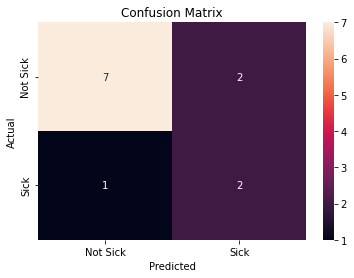

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

actual_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick"]
predicted_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Sick", "Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Not Sick"]
labels = ["Not Sick", "Sick"]

cm = confusion_matrix(actual_data, predicted_data)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

Let's evaluate this in details by having a look at the following image -

\
![alt text](https://drive.google.com/uc?export=view&id=1kByrwoYIfDyTc_K3ds6OCdZ30qODkD6-)


\
From here, we can see that there are 9 correct predictions and 3 incorrect predictions.

\
Let's calculate the accuracy and precision scores for this.

```
accuracy = 2 + 7 / 2 + 7 + 2 + 1
accuracy = 9 / 12
accuracy = 0.75
```

\
Now, let's take a dataset and perform some logistic regression on it to see the accuracy of our model with the confusion matrix.



In [8]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

KeyboardInterrupt: ignored

Let's see how the age of the person increases the list of a heart attack, by using single variable logistic regression.

In [9]:
import pandas as pd

df = pd.read_csv("c117.csv")

print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [10]:
from sklearn.model_selection import train_test_split 

age = df["age"]
heart_attack = df["target"]

age_train, age_test, heart_attack_train, heart_attack_test = train_test_split(age, heart_attack, test_size = 0.25, random_state = 0)

In [11]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(age_train.ravel(), (len(age_train), 1))
Y = np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [12]:
X_test = np.reshape(age_test.ravel(), (len(age_test), 1))
Y_test = np.reshape(heart_attack_test.ravel(), (len(heart_attack_test), 1))

heart_attack_prediction = classifier.predict(X_test)

predicted_values = []
for i in heart_attack_prediction:
  if i == 0:
    predicted_values.append("No")
  else:
    predicted_values.append("Yes")

actual_values = []
for i in Y_test.ravel():
  if i == 0:
    actual_values.append("No")
  else:
    actual_values.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

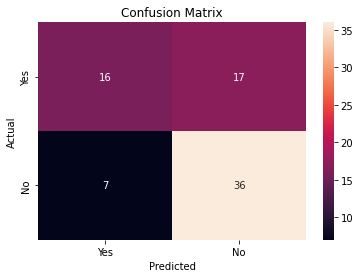

In [13]:
labels = ["Yes", "No"]

cm = confusion_matrix(actual_values, predicted_values)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

From here, we can see the following things -



1.   36 People both actually got a heart attack and were predicted to get a heart attack.
2.   16 People didn't get a heart attack and were also predicted to not get a heart attack.
3.   7 People actually got a heart attack while they were not predicted to get one.
4.   17 people were predicted to get a heart attack while they did not get one.

\
Our model has the accuracy as -
```
accuracy = 36 + 16 / 36 + 16 + 17 + 7
accuracy = 52 / 76
accuracy = 0.68421052631
```

\
What if we use more variables, instead of just age? Will our model's accuracy increase? Let's see!

\
In our data, `cp` stands for `chest pain` and `chol` stands for `cholestrol`. `thalach` stands for `Maximum heart rate achieved`. Let's include these along with the gender of the person.



In [14]:
factors = df[["age","sex","cp","chol","thalach"]]
heart_attack = df["target"]

factors_train, factors_test, heart_attack_train, heart_attack_test = train_test_split(factors, heart_attack, test_size= 0.25, random_state= 0) 


In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.transform(factors_test)

classifier2 = LogisticRegression(random_state = 0) 
classifier2.fit(factors_train, heart_attack_train)



LogisticRegression(random_state=0)

In [22]:
heart_attack_prediction_1 = classifier2.predict(factors_test)

predicted_values_1 = []

for i in heart_attack_prediction_1:
  if i == 0:
    predicted_values_1.append("No")
  else:
    predicted_values_1.append("Yes")


actual_values_1 = []

for i in heart_attack_test.ravel():
  if i == 0:
    actual_values_1.append("No")
  else:
    actual_values_1.append("Yes")


[Text(0, 0.5, 'yes'), Text(0, 1.5, 'no')]

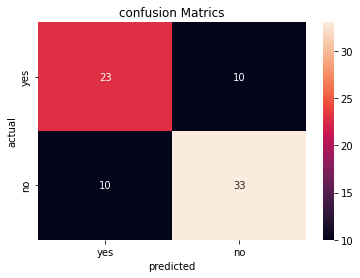

In [25]:
labels = ["yes", "no"]

cm = confusion_matrix(actual_values_1, predicted_values_1)

ax = plt.subplot()

sns.heatmap(cm, annot = True, ax = ax )

ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('confusion Matrics')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)